In [1]:
import pandas as pd
import os
import numpy as np
import ccxt
import matplotlib.pyplot as plt

In [19]:
# Dataset path
data_path = 'C:/Users/Phip-C/Offline Ablage/08 Trading/Historical data/Bitcoin/data.csv'

# Download data

In [27]:
# Set up exchange (Binance as an example)
exchange = ccxt.binance()

symbol = 'BTC/USDT'
timeframe = '1d'  # 1-hour candles
limit = 1000  # max number of data points per request
all_data = []

# Specify the start time (in milliseconds) for the first request
since = exchange.parse8601('2015-01-01T00:00:00Z')

# Fetch in chunks of 1000 until we get enough data
while True:
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since, limit)
    if len(ohlcv) == 0:
        break  # No more data to fetch
    
    all_data += ohlcv
    # Set the 'since' parameter for the next request to the timestamp of the last data point
    since = ohlcv[-1][0] + 1  # Move to the next timestamp after the last point

# Convert to DataFrame
df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

In [28]:
df.iloc[0]

open      4261.480000
high      4485.390000
low       4200.740000
close     4285.080000
volume     795.150377
Name: 2017-08-17 00:00:00, dtype: float64

In [11]:
start_date_data = df.index[0]
start_date_data

Timestamp('2017-08-17 00:00:00')

In [13]:
# Longest indicator lag planed to use in any strategy
maximum_lag = 280
# Define start date using maximum lag
start_date_train = df.index[maximum_lag]
start_date_train

Timestamp('2018-05-24 00:00:00')

In [16]:
split_ratio = 0.7
split_index = int((len(df)-maximum_lag)*0.7 + maximum_lag)
split_date = df.index[split_index]
split_date

Timestamp('2023-03-10 00:00:00')

In [17]:
end_date_test = df.index[-1]
end_date_test

Timestamp('2025-03-29 00:00:00')

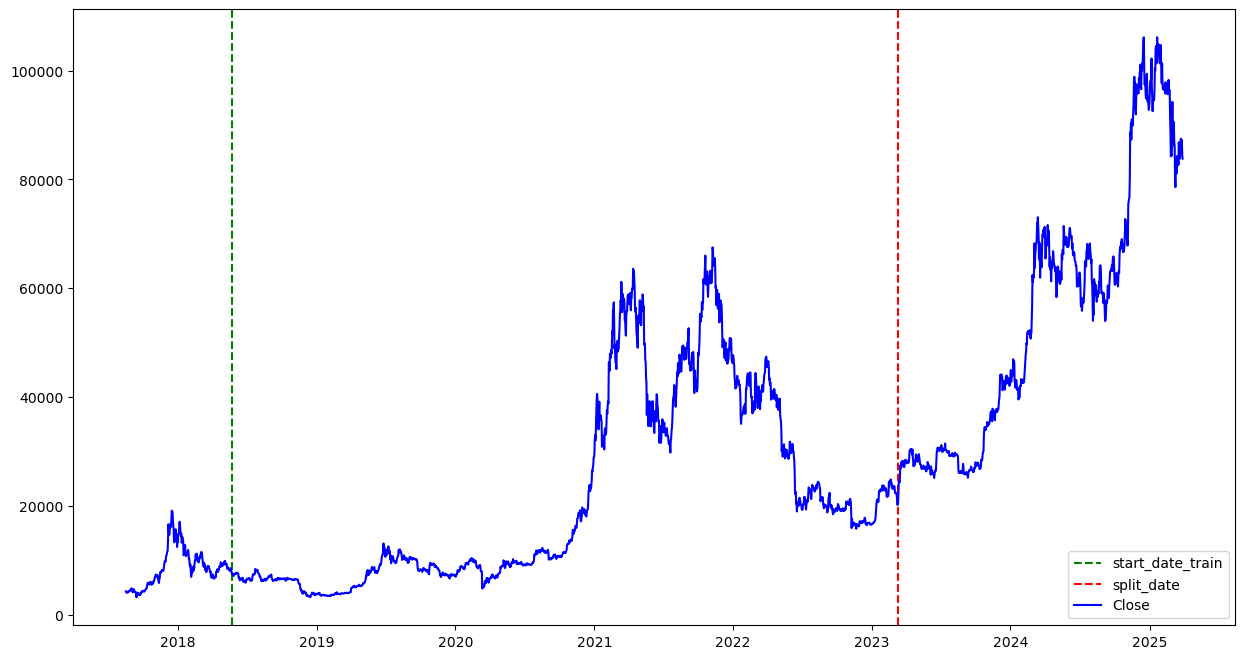

In [18]:
plt.figure(figsize=(15, 8))
plt.axvline(x=start_date_train, color='green', linestyle='--', label='start_date_train')
plt.axvline(x=split_date, color='red', linestyle='--', label='split_date')

plt.plot(df.index, df['close'], label='Close', color='blue')
plt.legend()
plt.show()

# Save to csv

In [ ]:
df.to_csv(data_path) 